In [1]:
import sys,os
sys.path.append("./")

In [3]:
#import keras
import os
import predict
import util
import load
import scipy.signal as sig
import tqdm

ModuleNotFoundError: No module named 'keras'

In [2]:
data_json, model_path = "../examples/cinc17/dev.json","../saved/cinc17/1575022999-481/0.384-0.890-019-0.301-0.898.hdf5"

In [12]:
predidctions = predict.predict(data_json,model_path)

100%|██████████| 852/852 [00:00<00:00, 3555.23it/s]


852/852 [==============================] - 16s 19ms/step


In [15]:
preproc = util.load(os.path.dirname(model_path))
dataset = load.load_dataset(data_json)
x, y = preproc.process(*dataset)
x.shape

100%|██████████| 852/852 [00:00<00:00, 3819.79it/s]


(852, 18176, 1)

In [4]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
#conf = confusion_matrix(np.argmax(y,axis=1), np.argmax(predidctions,axis=1))

In [3]:
predidctions.shape

NameError: name 'predidctions' is not defined

In [6]:
pred_reshaped = np.reshape(predidctions,(predidctions.shape[0]*predidctions.shape[1],predidctions.shape[2]))

NameError: name 'predidctions' is not defined

In [7]:
y_reshaped = np.reshape(y,(y.shape[0]*y.shape[1],y.shape[2]))

In [8]:
conf = confusion_matrix(np.argmax(y_reshaped,axis=1), np.argmax(pred_reshaped,axis=1))
conf

NameError: name 'pred_reshaped' is not defined

In [9]:
import seaborn as sns

In [10]:
sns.heatmap(conf, annot=True, fmt="d")

NameError: name 'conf' is not defined

In [11]:
import json
print(classification_report(np.argmax(y_reshaped,axis=1), np.argmax(pred_reshaped,axis=1),target_names=preproc.classes))

NameError: name 'pred_reshaped' is not defined

In [12]:
preproc.classes

['A', 'N', 'O', '~']

In [38]:
x_hpi = np.load("../examples/hpi/X.npy")
y_hpi = np.load("../examples/hpi/Y.npy")

In [48]:
x_hpi_resampled = []
for trace in tqdm.tqdm(x_hpi):
    tmp = sig.resample(trace, len(trace) // 360 * 200)
    x_hpi_resampled.append(tmp[:18176])
x_hpi_resampled = np.array(x_hpi_resampled)
x_hpi_resampled = np.expand_dims(x_hpi_resampled, axis=2)

100%|██████████| 16672/16672 [00:23<00:00, 724.84it/s]


In [55]:
x_hpi_resampled.shape

(16672, 18176, 1)

In [50]:
x.shape

(852, 18176, 1)

In [51]:
y.shape

(852, 71, 4)

In [52]:
24000/200

120.0

In [33]:
18176/200

90.88

In [81]:
from keras import backend as K
K.clear_session()

In [1]:
from numba import cuda
cuda.select_device(0)
cuda.close()

ModuleNotFoundError: No module named 'numba'

In [5]:
model = keras.models.load_model(model_path)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


In [14]:
from tensorflow.keras.utils import plot_model
import pydot
#plot_model(model)

ModuleNotFoundError: No module named 'pydot'

In [57]:
predictions = model.predict(x_hpi_resampled)

In [63]:
conf = confusion_matrix(np.argmax(y_hpi,axis=1), np.argmax(np.mean(predictions, axis=1),axis=1))

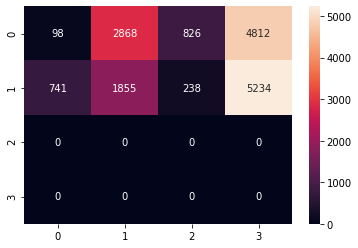

In [65]:
sns.heatmap(conf, annot=True, fmt="d")

In [62]:
np.argnp.mean(predictions, axis=1).shape

(16672, 4)

In [66]:
np.argmax(np.mean(predictions, axis=1),axis=1)

array([3, 3, 3, ..., 2, 2, 2])

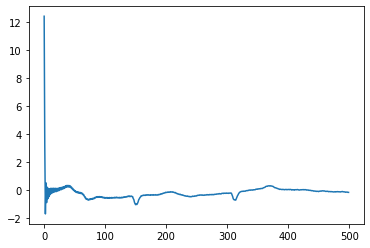

In [79]:
import matplotlib.pyplot as plt
plt.plot(x_hpi_resampled[0][0:500])